# Association mining analysis

## Convert to transactions data 

In [1]:
library(tidyverse)
library(dplyr)
library(stringr)
library(lubridate)
library(tidyr)
library(arules)
library(arulesViz)
require(arulesSequences)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"package 'arules' was built under R version 3.4.3"Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand


Attaching package: 'arules'

The following object is masked from 'package:dplyr':

    recode

The following objects are masked from 'package:base':

    abbreviate, write

Warning message:
"package 'arulesViz' was built under R version 3.4.3"Loading required package: grid
Loading required package: arulesSequences
Warning message:
"package 'arulesSequences' was built under R version 3.4.3"

In [3]:
load("dataset.RData")
all_collection <- unique(dataset$product_line_code)
product_mon <- list()
all_collection

[1] AECCOL PDCOLL MECOLL
Levels: AECCOL MECOLL PDCOLL

In [5]:
for(i in 1: length(all_collection)){
    product_mon[[i]] <- dataset%>%
    filter(product_line_code == all_collection[i])%>%
    filter(!is.na(product_line_name))%>%
    mutate(year_month = str_c(year(dt),"-",month(dt))) %>%
    group_by(owner_id,product_line_name,year_month)%>%
    summarise(use_of_product = sum(sessions))%>%
    ungroup()%>%
    group_by(owner_id, year_month)%>%
    summarise(products = list(unique(product_line_name)))%>%
    mutate(num_product = str_c("{",map_chr(products,str_c,collapse = ","),"}"),
           size = map_dbl(products,length))%>%
    ungroup()%>%
    group_by(owner_id)%>%
    mutate(eid = 1:n())  
    }

aec_tran<-as(product_mon[[1]]$products, "transactions")
inspect(head(aec_tran,3))

pdc_tran<-as(product_mon[[2]]$products, "transactions")
inspect(head(pdc_tran,3))

mec_tran<-as(product_mon[[3]]$products, "transactions")
inspect(head(mec_tran,3))

    items           
[1] {3DSMAX,ACD,RVT}
[2] {3DSMAX,ACD,RVT}
[3] {3DSMAX,ACD,RVT}
    items                         
[1] {ACD,AMECH_PP,INVPROSA,NAVMAN}
[2] {ACD,INVPROSA}                
[3] {ACD,INVPROSA,NAVMAN}         
    items              
[1] {3DSMAX}           
[2] {3DSMAX}           
[3] {MAYA,MOBPRO,RECAP}


## The most frequent items 

### AEC collection

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE    0.01      1     15 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 1221 

create itemset ... 
set transactions ...[26 item(s), 122119 transaction(s)] done [0.02s].
sorting and recoding items ... [13 item(s)] done [0.00s].
creating bit matrix ... [13 row(s), 122119 column(s)] done [0.01s].
writing  ... [97 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].
     items                     support    count
[1]  {ACD,PNID}                0.01066173  1302
[2]  {ACAD_E,ACD,RVT}          0.01097290  1340
[3]  {ACAD_E,RVT}              0.01357692  1658
[4]  {ACAD_E,ACD}              0.01544395  1886
[5]  {CIV3D,RECAP,RVT}         0.01016222  1241
[6]  {ACD,NAVMAN,RECAP,RVT}    0.01257790  1536
[7]  {NAVMAN,RECAP,RVT}        0.01620550  1979
[8]  {ACD,NAVMAN,RECAP}        0.01478066  1805
[9]  {ACD,RECAP,RVT}       

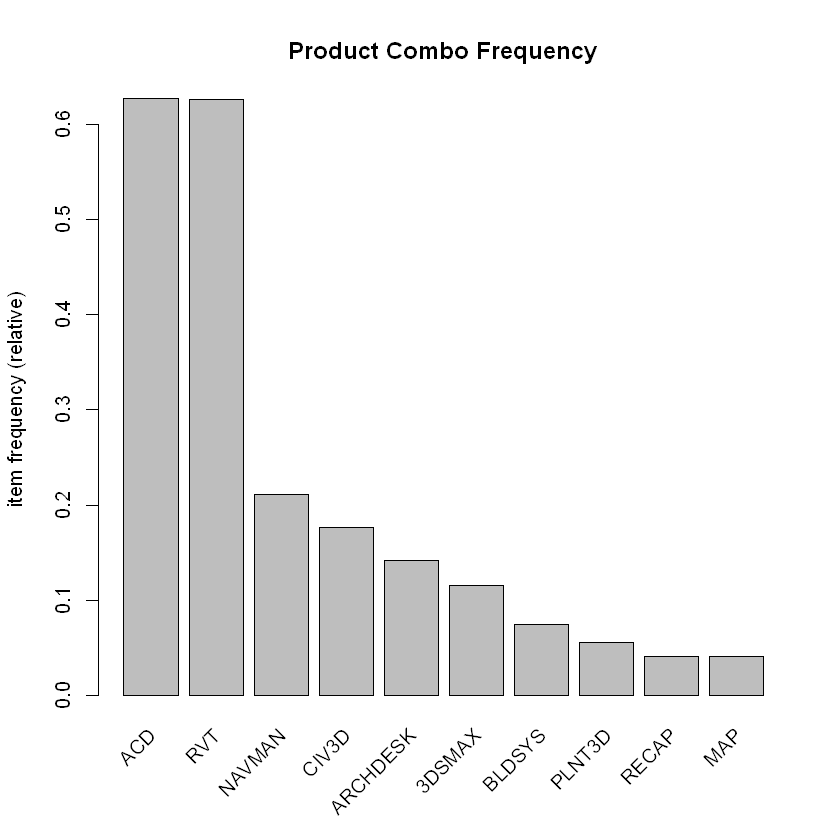

In [6]:
frequentItems<-eclat(aec_tran, parameter = list(support = 0.01, maxlen = 15))
inspect(frequentItems)

itemFrequencyPlot(aec_tran, topN=10, support = 0.01, main="Product Combo Frequency")               

### PDC collection

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE    0.01      1     15 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 581 

create itemset ... 
set transactions ...[17 item(s), 58152 transaction(s)] done [0.01s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating bit matrix ... [9 row(s), 58152 column(s)] done [0.00s].
writing  ... [70 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].
     items                               support    count
[1]  {ACD,INVPROSA,RECAP}                0.01048975   610
[2]  {AMECH_PP,INVPROSA,RECAP}           0.01064452   619
[3]  {INVPROSA,RECAP}                    0.01855482  1079
[4]  {AMECH_PP,RECAP}                    0.01145274   666
[5]  {ACD,RECAP}                         0.01167630   679
[6]  {ACD,INVNTOR,INVPROSA}              0.01238135   720
[7]  {AMECH_PP,INVNTOR,INVPROSA}         0.01501238   873


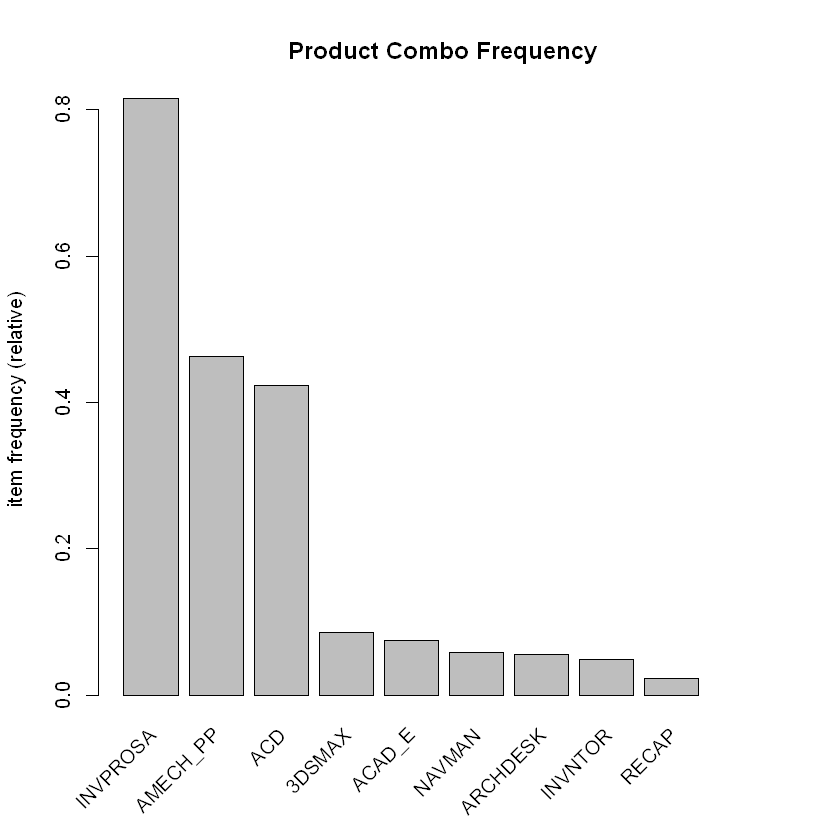

In [10]:
frequentItems<-eclat(pdc_tran, parameter = list(support = 0.01, maxlen = 15))
inspect(frequentItems)

itemFrequencyPlot(pdc_tran, topN=10, support = 0.01, main="Product Combo Frequency")               

### MEC collection 

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE    0.01      1     15 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 33 

create itemset ... 
set transactions ...[8 item(s), 3324 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating bit matrix ... [5 row(s), 3324 column(s)] done [0.00s].
writing  ... [17 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].
     items                support    count
[1]  {3DSMAX,MAYA,RECAP}  0.01564380   52 
[2]  {MAYA,RECAP}         0.01925391   64 
[3]  {3DSMAX,RECAP}       0.01925391   64 
[4]  {MAYA,MBXPRO,MOBPRO} 0.01022864   34 
[5]  {3DSMAX,MAYA,MBXPRO} 0.01744886   58 
[6]  {MAYA,MBXPRO}        0.02587244   86 
[7]  {3DSMAX,MBXPRO}      0.02075812   69 
[8]  {MBXPRO,MOBPRO}      0.01113117   37 
[9]  {3DSMAX,MAYA,MOBPRO} 0.01925391   64 
[10] {MAYA,MOBPRO}        0.03459687  

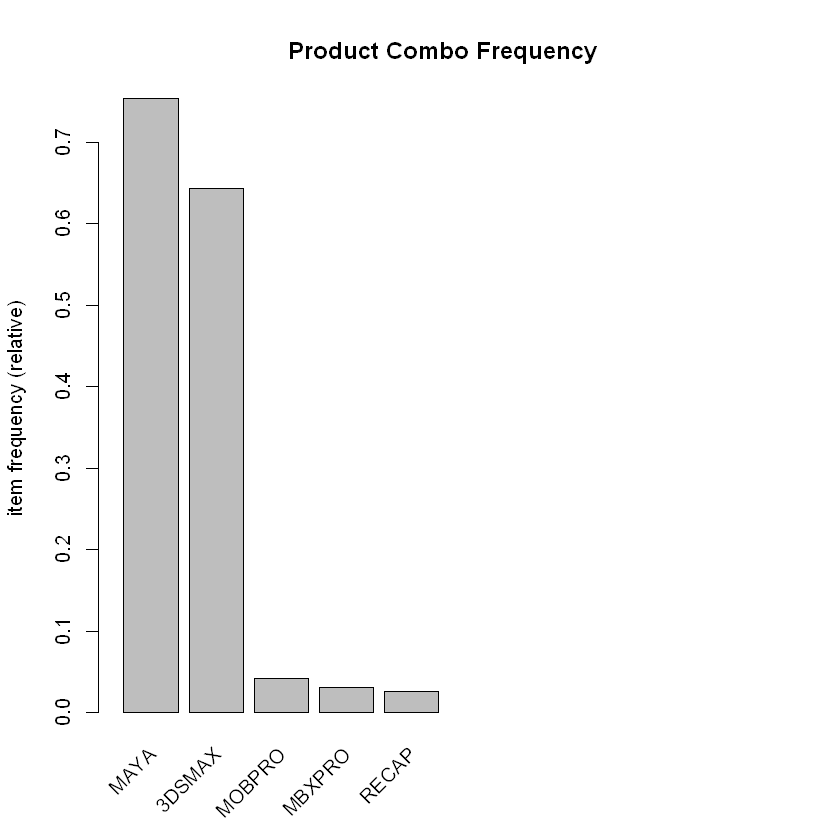

In [11]:
frequentItems<-eclat(mec_tran, parameter = list(support = 0.01, maxlen = 15))
inspect(frequentItems)

itemFrequencyPlot(mec_tran, topN=10, support = 0.01, main="Product Combo Frequency")               

## Product recommendation rules

Rules: A -> B

support: P(A∩B)
The probability of products both in A and B happened to be used, specifically, the percentage of occurance for A and B together occupied in all usage.

confidence: P(A∩B)/P(A)
The probability that A and B happened when A happened.

Lift: P(A∩B)/(P(A)*P(B))
The ratio of probability that A and B happened together over the probability that only B happened.

### AEC collection 

In [7]:
aec_rules<-apriori(aec_tran,
               parameter = list(support= 0.01, confidence = 0.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1221 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[26 item(s), 122119 transaction(s)] done [0.03s].
sorting and recoding items ... [13 item(s)] done [0.00s].
creating transaction tree ... done [0.06s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [98 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [8]:
aec_rules_conf <- sort (aec_rules, by="confidence", decreasing=TRUE)
inspect(aec_rules_conf)

     lhs                      rhs      support    confidence lift      count
[1]  {3DSMAX,ACD,NAVMAN}   => {RVT}    0.02563893 0.9235988  1.4725561  3131
[2]  {ACD,ARCHDESK,NAVMAN} => {RVT}    0.01504270 0.9139303  1.4571410  1837
[3]  {3DSMAX,CIV3D,NAVMAN} => {RVT}    0.01144785 0.9072031  1.4464153  1398
[4]  {3DSMAX,NAVMAN}       => {RVT}    0.03043752 0.8982600  1.4321568  3717
[5]  {ARCHDESK,NAVMAN}     => {RVT}    0.02092222 0.8958626  1.4283343  2555
[6]  {3DSMAX,ACD,ARCHDESK} => {RVT}    0.01433028 0.8865248  1.4134465  1750
[7]  {ACD,BLDSYS,NAVMAN}   => {RVT}    0.01653305 0.8847502  1.4106172  2019
[8]  {ACD,CIV3D,NAVMAN}    => {RVT}    0.02425503 0.8638087  1.3772287  2962
[9]  {ACD,NAVMAN,RECAP}    => {RVT}    0.01257790 0.8509695  1.3567583  1536
[10] {3DSMAX,NAVMAN,RVT}   => {ACD}    0.02563893 0.8423460  1.3415730  3131
[11] {3DSMAX,CIV3D,NAVMAN} => {ACD}    0.01061260 0.8410123  1.3394489  1296
[12] {BLDSYS,CIV3D}        => {RVT}    0.01062079 0.8378553  1.3358494  1297

The rules with confidence of 0.9235 (see rules_conf above) imply that, whenever the LHS item was used, the RHS item was also used 92.35% of the time.

In [12]:
aec_rules_lift <- sort (aec_rules, by="lift", decreasing=TRUE)
inspect(head(aec_rules_lift,10))

     lhs                   rhs      support    confidence lift     count
[1]  {ACD,MAP,RVT}      => {CIV3D}  0.01132502 0.7143595  4.048866 1383 
[2]  {ACD,MAP}          => {CIV3D}  0.01731098 0.6922069  3.923309 2114 
[3]  {MAP,RVT}          => {CIV3D}  0.01391266 0.6718070  3.807686 1699 
[4]  {MAP}              => {CIV3D}  0.02561436 0.6314090  3.578717 3128 
[5]  {ACD,PLNT3D,RVT}   => {NAVMAN} 0.01166076 0.6460980  3.066969 1424 
[6]  {ACD,RECAP,RVT}    => {NAVMAN} 0.01257790 0.6161252  2.924690 1536 
[7]  {PLNT3D,RVT}       => {NAVMAN} 0.01392085 0.6088825  2.890310 1700 
[8]  {3DSMAX,CIV3D,RVT} => {NAVMAN} 0.01144785 0.5928753  2.814326 1398 
[9]  {ACD,PLNT3D}       => {NAVMAN} 0.02025893 0.5757505  2.733036 2474 
[10] {ACD,RECAP}        => {NAVMAN} 0.01478066 0.5721078  2.715744 1805 


A rule with a lift of 4.04 (see rules_lift above) imply that, the items in LHS and RHS are 4.04 times more likely to be used together compared to the usage when only rhs is used.

### PDC collection 

In [13]:
pdc_rules<-apriori(pdc_tran,
               parameter = list(support= 0.01, confidence = 0.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 581 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 58152 transaction(s)] done [0.01s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [14]:
pdc_rules_conf <- sort (pdc_rules, by="confidence", decreasing=TRUE)
inspect(pdc_rules_conf)

     lhs                             rhs        support    confidence lift     
[1]  {ACD,AMECH_PP,NAVMAN}        => {INVPROSA} 0.01492640 0.9507119  1.1655311
[2]  {3DSMAX,ACAD_E,AMECH_PP}     => {INVPROSA} 0.01059293 0.9447853  1.1582652
[3]  {ACAD_E,NAVMAN}              => {INVPROSA} 0.01016302 0.9380952  1.1500635
[4]  {3DSMAX,ACAD_E}              => {INVPROSA} 0.01293163 0.9376559  1.1495249
[5]  {3DSMAX,NAVMAN}              => {INVPROSA} 0.01315518 0.9329268  1.1437273
[6]  {ACAD_E,ACD,ARCHDESK}        => {INVPROSA} 0.01009424 0.9317460  1.1422797
[7]  {ACAD_E,AMECH_PP,ARCHDESK}   => {INVPROSA} 0.01177947 0.9307065  1.1410053
[8]  {AMECH_PP,RECAP}             => {INVPROSA} 0.01064452 0.9294294  1.1394396
[9]  {ACAD_E,ACD,AMECH_PP}        => {INVPROSA} 0.01953501 0.9288635  1.1387458
[10] {ARCHDESK,NAVMAN}            => {INVPROSA} 0.01296602 0.9285714  1.1383878
[11] {AMECH_PP,NAVMAN}            => {INVPROSA} 0.03224309 0.9263834  1.1357053
[12] {ACAD_E,ARCHDESK}            => {IN

In [15]:
pdc_rules_lift <- sort (pdc_rules, by="lift", decreasing=TRUE)
inspect(head(pdc_rules_lift,10))

     lhs                           rhs        support    confidence lift    
[1]  {ACAD_E,ARCHDESK,INVPROSA} => {AMECH_PP} 0.01177947 0.8363858  1.809229
[2]  {ACAD_E,ARCHDESK}          => {AMECH_PP} 0.01265649 0.8241881  1.782844
[3]  {3DSMAX,ACAD_E,INVPROSA}   => {AMECH_PP} 0.01059293 0.8191489  1.771943
[4]  {3DSMAX,ACAD_E}            => {AMECH_PP} 0.01121200 0.8129676  1.758572
[5]  {ACAD_E,ARCHDESK,INVPROSA} => {ACD}      0.01009424 0.7167277  1.694137
[6]  {ACAD_E,ARCHDESK}          => {ACD}      0.01083368 0.7054871  1.667567
[7]  {3DSMAX,NAVMAN}            => {AMECH_PP} 0.01038657 0.7365854  1.593346
[8]  {3DSMAX}                   => {ACD}      0.05071193 0.5958780  1.408483
[9]  {INVPROSA,NAVMAN}          => {AMECH_PP} 0.03224309 0.6461061  1.397625
[10] {3DSMAX,INVPROSA}          => {ACD}      0.03655936 0.5899001  1.394353
     count
[1]   685 
[2]   736 
[3]   616 
[4]   652 
[5]   587 
[6]   630 
[7]   604 
[8]  2949 
[9]  1875 
[10] 2126 


### MEC collection 

In [16]:
mec_rules<-apriori(mec_tran,
               parameter = list(support= 0.01, confidence = 0.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 33 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[8 item(s), 3324 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [17 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [17]:
mec_rules_conf <- sort (mec_rules, by="confidence", decreasing=TRUE)
inspect(mec_rules_conf)

     lhs                rhs      support    confidence lift      count
[1]  {MBXPRO,MOBPRO} => {MAYA}   0.01022864 0.9189189  1.2188693   34 
[2]  {MBXPRO}        => {MAYA}   0.02587244 0.8431373  1.1183513   86 
[3]  {3DSMAX,MBXPRO} => {MAYA}   0.01744886 0.8405797  1.1149589   58 
[4]  {MOBPRO}        => {MAYA}   0.03459687 0.8394161  1.1134154  115 
[5]  {3DSMAX,MOBPRO} => {MAYA}   0.01925391 0.8205128  1.0883418   64 
[6]  {3DSMAX,RECAP}  => {MAYA}   0.01564380 0.8125000  1.0777135   52 
[7]  {MAYA,RECAP}    => {3DSMAX} 0.01564380 0.8125000  1.2638044   52 
[8]  {}              => {MAYA}   0.75391095 0.7539110  1.0000000 2506 
[9]  {RECAP}         => {3DSMAX} 0.01925391 0.7356322  1.1442402   64 
[10] {RECAP}         => {MAYA}   0.01925391 0.7356322  0.9757547   64 
[11] {MBXPRO}        => {3DSMAX} 0.02075812 0.6764706  1.0522172   69 
[12] {MAYA,MBXPRO}   => {3DSMAX} 0.01744886 0.6744186  1.0490255   58 
[13] {}              => {3DSMAX} 0.64290012 0.6429001  1.0000000 2137 
[14] {

In [18]:
mec_rules_lift <- sort (mec_rules, by="lift", decreasing=TRUE)
inspect(head(mec_rules_lift,10))

     lhs                rhs      support    confidence lift     count
[1]  {MAYA,RECAP}    => {3DSMAX} 0.01564380 0.8125000  1.263804  52  
[2]  {MBXPRO,MOBPRO} => {MAYA}   0.01022864 0.9189189  1.218869  34  
[3]  {RECAP}         => {3DSMAX} 0.01925391 0.7356322  1.144240  64  
[4]  {MBXPRO}        => {MAYA}   0.02587244 0.8431373  1.118351  86  
[5]  {3DSMAX,MBXPRO} => {MAYA}   0.01744886 0.8405797  1.114959  58  
[6]  {MOBPRO}        => {MAYA}   0.03459687 0.8394161  1.113415 115  
[7]  {3DSMAX,MOBPRO} => {MAYA}   0.01925391 0.8205128  1.088342  64  
[8]  {3DSMAX,RECAP}  => {MAYA}   0.01564380 0.8125000  1.077713  52  
[9]  {MBXPRO}        => {3DSMAX} 0.02075812 0.6764706  1.052217  69  
[10] {MAYA,MBXPRO}   => {3DSMAX} 0.01744886 0.6744186  1.049025  58  
